#### Barrier interior point method

For twice-differentiable convex functions $f_i$, we want to solve

$$\min f_0(x), \text{s.t. } f_i(x)\leq 0, i=1, \cdots, m, \,Ax=b$$

where $A\in \mathbf{R}^{p \times n}, \, \text{rank }A=p$, and $p^*$ is optimal value

We see previously that this problem can be formulated as a `sequence` of centering problem parameterized by variable $t$

For each $t$, we solve an equality-constrained optimization

$$\min tf_0(x)+\phi(x), \text{s.t. } Ax=b$$

where $\phi(x)$ is the log-barrier function eliminating the inequality constraints

$$\phi(x)=-\sum_{i=1}^m \log (-f_i(x)), \text{dom }\phi=\{x|f_1(x)<0,\cdots,f_m(x)<0\} $$

Once we solve the centering problem and obtained $x^*(t)$, we get a set of dual feasible point $\lambda^*, \nu^*$ and the duality gap is given by

$$p^*\geq g(\lambda^*(t), \nu^*(t))=f_0(x^*(t))-\frac{m}{t}$$

We then crank up $t$ and iteratively solve the `centering problem` to reduce the duality gap until desired accuracy

This is known as the `barrier method`, and we get `Newton's step` by solving the KKT equations

$$\boxed{\begin{bmatrix}
t\nabla^2 f_0(x)+\nabla^2 \phi(x) & A^T \\ A & 0
\end{bmatrix}\begin{bmatrix}
\Delta x_{nt}\\ \nu_{nt}
\end{bmatrix}=\begin{bmatrix}
-t\nabla f_0(x)+\nabla \phi(x)\\0
\end{bmatrix}}$$

On central path, $x^*, \lambda^*, \nu^*$ almost satisfy the KKT conditions for the original problem, except for the complementary slackness $-\lambda_i^*f_i(x^*)=1/t$

#### Interpretation as reducing primal and dual residual

We can also see barrier method as minimizing the residuals directly from the `original problem`, using Newton's method

We write the `residual` as

$$r(x, \lambda, w)=\begin{bmatrix}\nabla f_0(x)+\sum_{i=1}^m \lambda_i \nabla f_i(x)+ A^Tw \\ -\text{diag}(\lambda)f(x)-\frac{1}{t}\mathbf{1}\\Ax-b\end{bmatrix}\begin{array}{l}\text{dual residual} \\ \text{centrality residual}\\ \text{primal residual}\end{array}$$

For the dual residual, we can also write as

$$\begin{align*}
r_{d}&=\nabla f_0(x)+\sum_{i=1}^m \lambda_i\nabla f_i(x)+ A^Tw \\
&=\nabla f_0(x)+Df(x)^T \lambda+ A^Tw
\end{align*}$$

where

$$Df(x) = \begin{bmatrix}\nabla f_1(x)^T \\ \vdots \\ \nabla f_m(x)^T\end{bmatrix}$$

We plug in $\lambda_i=-1/(tf_i(x))$ to eliminate $\lambda_i$

$$r(x, w)=\begin{bmatrix}\nabla f_0(x)+\sum_{i=1}^m \frac{1}{-tf_i(x)}\nabla f_i(x)+ A^Tw \\Ax-b\end{bmatrix}\begin{array}{l}\text{dual residual} \\  \text{primal residual}\end{array}$$

Similar to the primal-dual interpretation of Newton step, we `linearize` the residual and set it to zero


$$r(x, w)+Dr(x, w)\begin{bmatrix} \Delta x_{nt} \\ \Delta w_{nt} \end{bmatrix}=0$$

For the Jacobian, we have

$$Dr(x, w)=\begin{bmatrix}\frac{\partial r_1}{\partial x} & \frac{\partial r_1}{\partial w}\\ \frac{\partial r_2}{\partial x} & \frac{\partial r_2}{\partial w} \end{bmatrix}=\begin{bmatrix}\nabla^2 f(x) & A^T\\ A & 0 \end{bmatrix}$$

More specifically

$$\begin{align*}
\nabla^2f(x)&=\nabla \left(\nabla f_0(x)+\sum_{i=1}^m\frac{1}{-tf_i(x)}\nabla f_i(x)\right)\\
&\nabla \left(\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla f_i(x)\right)=\sum_{i=1}^m\frac{1}{f_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T +\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla^2 f_i(x) \\
&=\nabla^2 f_0(x) + \sum_{i=1}^m\frac{1}{tf_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T +\sum_{i=1}^m\frac{1}{-tf_i(x)}\nabla^2 f_i(x)
\end{align*}$$

Let $w = w + \Delta w_{nt}$, we have

$$H\Delta x_{nt} + A^Tw = -g, \,\,A\Delta x_{nt}=0$$

where

$$\begin{align*}
H&=\nabla^2 f_0(x) + \sum_{i=1}^m\frac{1}{tf_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T +\sum_{i=1}^m\frac{1}{-tf_i(x)}\nabla^2 f_i(x)\\
g &= \nabla f_0(x) + \sum_{i=1}^m \frac{1}{-tf_i(x)}\nabla f_i(x)
\end{align*}$$

Compare to the expression of $\nabla \phi(x)$ and $\nabla^2 \phi(x)$, we see that

$$H=\nabla^2 f_0(x) + \frac{1}{t}\nabla^2 \phi(x),\,\, g=\nabla f_0(x)+\frac{1}{t}\nabla \phi(x)$$

Compare to the centering problem

$$\begin{bmatrix}
t\nabla^2 f_0(x)+\nabla^2 \phi(x) & A^T \\ A & 0
\end{bmatrix}\begin{bmatrix}
\Delta x_{nt}\\ \nu_{nt}
\end{bmatrix}=\begin{bmatrix}
-t\nabla f_0(x)+\nabla \phi(x)\\0
\end{bmatrix}$$

we see that Newton step for `primal` variable from the solving the residual of the `original` problem (based on the modified KKT conditions) is the same as directly solving the KKT equations of the `centering` problem

For the `dual` variable, we get a scaled version compared to solving the KKT equations

$$w=\frac{1}{t}\nu_{nt}$$

#### Primal-dual interior point method

An alternative to the barrier method is the primal-dual method, which does not get rid of $\lambda_i$ and instead solves the complete equations of residuals for $\Delta x, \Delta \lambda, \Delta \nu$ (analogous to infeasible start Newton's method)

The linearized residual becomes

$$r(x, \lambda, \nu)+Dr(x, \lambda, \nu)\begin{bmatrix} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{bmatrix}=0$$

where

$$r(x, \lambda, \nu)=\begin{bmatrix}\nabla f_0(x)+\sum_{i=1}^m \lambda_i \nabla f_i(x)+ A^T\nu \\ -\text{diag}(\lambda)f(x)-\frac{1}{t}\mathbf{1}\\Ax-b\end{bmatrix}\begin{array}{l}\text{dual residual} \\ \text{centrality residual}\\ \text{primal residual}\end{array}$$

For the Jacobian, we have

$$Dr(x, \lambda, \nu)=\begin{bmatrix}\nabla^2 f_0(x)+\sum_{i=1}^m \lambda_i \nabla^2 f_i(x) & Df(x)^T & A^T \\
-\text{diag}(\lambda) Df(x) & -\text{diag}(f(x)) & 0 \\
A & 0 & 0 \end{bmatrix}$$

##### Surrogate duality gap

Since the primal-dual method does not guarantee feasibility at each iteration, except in the limit as the algorithm converges, surrogate duality gap is often used

For any $x$ such that $f(x)\leq 0$ and $\lambda \geq 0$, the surrogate duality gap is given by

$$\hat{\eta}(x, \lambda) = -f(x)^T\lambda$$

Obviously, the surrogate duality gap becomes duality gap $m/t$, if $x, \lambda, \nu$ are feasible

##### Steps for primal-dual method

Given $x$ such that $f_i(x)<0, i=1, \cdots, m$, $\lambda >0, \mu>1$, repeat

* Compute surrogate duality gap $\hat{\eta}$
* $t=\mu m /\hat{\eta}$
* Solve primal-dual search direction $\Delta y=\begin{bmatrix} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{bmatrix}$
* Line search to determine step size $s$
* $y \leftarrow y + s\Delta y$

until $\|r_p\|_2\leq \epsilon_{\text{feas}}, \|r_d\|_2\leq \epsilon_{\text{feas}}$, and $\hat{\eta}\leq \epsilon$

That is, we check both residual (how far variables are from being feasible) and surrogate duality gap

##### Step size

To determine step size, the line search ensures that $\lambda >0$ and $f(x)<0$

We first compute the largest positive step length not exceeding one that gives $\lambda^+\geq 0$

$$s^{\max}=\min\{1, \min\{-\lambda_i/\Delta \lambda_i|\Delta \lambda_i<0\}\}$$

Then, we start with $s=0.99s^{\max}$ and do $s\leftarrow s\beta$ until

* $f(x^+)<0$ and
* $\|r(x^+, \lambda^+, \nu^+)\|_2\leq (1 - \alpha s)\|r(x, \lambda, \nu)\|_2$


#### Inequality form LP example

$$\min c^Tx,\,\, \text{s.t. } Ax\leq b$$

We have

* dual residual $r_d=c+A^T\lambda$
* centrality residual $r_c=-\text{diag}(\lambda)f(x)-\frac{1}{t}\mathbf{1}$

and the KKT equations

$$\begin{bmatrix}0 & A^T \\ -\text{diag}(\lambda)A & -\text{diag}(f(x))\end{bmatrix}\begin{bmatrix}\Delta x \\ \Delta \lambda\end{bmatrix}=-\begin{bmatrix}c+A^T\lambda \\ -\text{diag}(\lambda)f(x)-\frac{1}{t}\end{bmatrix}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

plt.style.use('dark_background')
# color: https://matplotlib.org/stable/gallery/color/named_colors.htm

In [2]:
def pd_ipm_lp_ieq(A, b, c, x0, mu, n_iter=100):
    n_iter = n_iter
    gap_eps = 1e-8
    res_eps = 1e-8
    mu = mu
    alpha = 0.01
    beta = 0.5

    m, n = A.shape
    gap_list = []
    res_list = []

    x = x0.copy()
    fx = A @ x - b
    lam = np.ones(m)

    for iter in range(n_iter):
        # surrogate duality gap -f(x)^T lambda
        gap = -fx @ lam
        gap_list.append(gap)

        # nabla f_0(x) + Df^T lambda, Df^T = A^T
        res = c + A.T @ lam
        res_list.append(np.linalg.norm(res))

        if gap < gap_eps and np.linalg.norm(res) < res_eps:
            return x, lam, iter, gap_list, res_list

        # primal-dual steps
        # get t
        t = m * mu / gap

        # KKT equations
        # 2 x 2 block
        kkt_block = np.block([
            [np.zeros((n, n)), A.T],
            [-np.diag(lam) @ A, -np.diag(fx)]
        ])
        rhs = -np.concatenate([res, -np.diag(lam) @ fx - 1/t])

        dy = np.linalg.solve(kkt_block, rhs)
        dx = dy[:n]
        dlam = dy[n:]

        # line search
        old_r = -rhs
        s_max = min(1, min(-lam[dlam<0]/dlam[dlam<0]))
        s = 0.99 * s_max

        # primal feasibility (f(x+s dx)<0)
        while np.min(b - A @ (x + s * dx)) <= 0:
            s *= beta

        newlam = lam + s * dlam
        newx = x + s * dx
        newfx = A @ newx - b
        new_r = np.concatenate([c + A.T @ newlam, -np.diag(newlam) @ newfx - 1/t])

        while np.linalg.norm(new_r) > (1 - alpha * s) * np.linalg.norm(old_r):
            s *= beta
            newlam = lam + s * dlam
            newx = x + s * dx
            newfx = A @ newx - b
            new_r = np.concatenate([c + A.T @ newlam, -np.diag(newlam) @ newfx - 1/t])

        x += s * dx
        lam += s * dlam
        fx = A @ x - b

    return x, lam, iter, gap_list, res_list

In [3]:
np.random.seed(42)

m, n = 500, 200
A = np.random.randn(m, n)
x = np.random.rand(n)
b0 = A @ x
# x strictly feasible
b = b0 + 1
c = A.T @ np.random.rand(m)
x0 = x
print("Initial objective value", c @ x0)

Initial objective value 117.35316777345444


In [4]:
x_var = cp.Variable(n)
constraints = [A @ x_var <= b]
objective = cp.Minimize(c @ x_var)

problem = cp.Problem(objective, constraints)

start_time = time.time()
result = problem.solve(solver=cp.SCS, eps=1e-5)
print("Time taken:", time.time() - start_time)

print("Optimal objective value (CVXPY):", result)
print("Primal feasible?", np.all(A @ x_var.value <= b))

Time taken: 13.433623313903809
Optimal objective value (CVXPY): -356.2157974048377
Primal feasible? False


Time taken: 3.9503281116485596
Optimal objective value: -356.2155532019069
Primal feasible? True


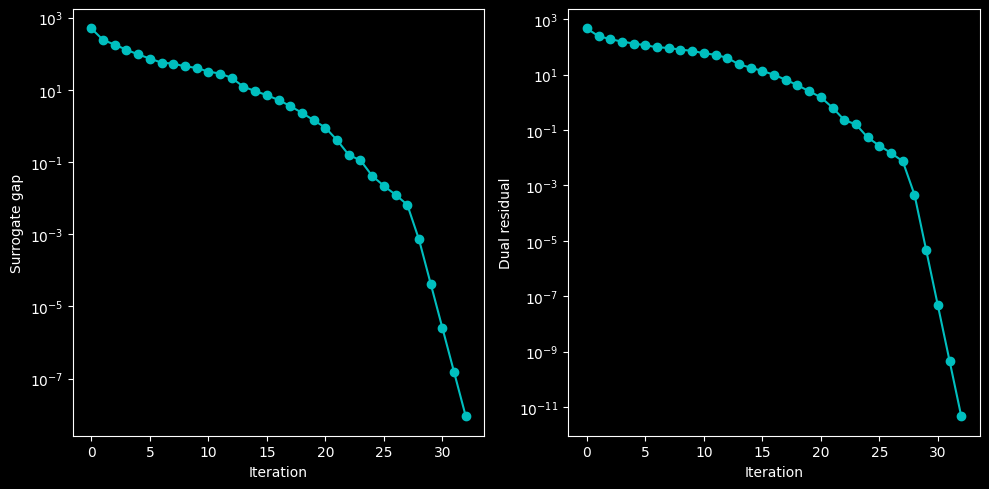

In [5]:
start_time = time.time()
x, lam, iters, gaps, rs = pd_ipm_lp_ieq(A, b, c, x0, mu=20)
print("Time taken:", time.time() - start_time)
print("Optimal objective value:", c @ x)
print("Primal feasible?", np.all(A @ x < b))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].semilogy(range(len(gaps)), gaps, 'o-', c='c')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Surrogate gap')

axs[1].semilogy(range(len(rs)), rs, 'o-', c='c')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Dual residual')

plt.tight_layout()
plt.show()

#### Standard LP example

$$\min c^Tx,\,\, \text{s.t. } Ax=b, -x\leq 0$$

We have

* dual residual $r_d=c-\lambda+A^T\nu$
* centrality residual $r_c=-\text{diag}(\lambda)f(x)-\frac{1}{t}\mathbf{1}$
* primal residual $r_p=Ax-b$

and the KKT equations

$$\begin{bmatrix}0 & -I & A^T \\ -\text{diag}(\lambda)(-I) & -\text{diag}(-x) & 0 \\ A & 0 & 0\end{bmatrix}\begin{bmatrix}\Delta x \\ \Delta \lambda \\ \Delta \nu\end{bmatrix}=-\begin{bmatrix}c-\lambda + A^T\nu \\ -\text{diag}(\lambda)(-x)-\frac{1}{t} \\ Ax - b\end{bmatrix}$$

In [6]:
def pd_ipm_lp_std(A, b, c, x0, mu, n_iter=500):
    n_iter = n_iter
    gap_eps = 1e-8
    res_eps = 1e-8
    mu = mu
    alpha = 0.01
    beta = 0.5

    m, n = A.shape
    gap_list = []
    res_p_list = []
    res_d_list = []

    x = x0.copy()
    fx = -x
    lam = np.ones(n)
    nu = np.ones(m)

    for iter in range(n_iter):
        # surrogate duality gap -f(x)^T lambda
        gap = -fx @ lam
        gap_list.append(gap)

        res_d = c - lam + A.T @ nu
        res_p = A @ x - b
        res_d_list.append(np.linalg.norm(res_d))
        res_p_list.append(np.linalg.norm(res_p))

        if gap < gap_eps and np.linalg.norm(res_p) < res_eps and np.linalg.norm(res_d) < res_eps:
            return x, lam, nu, iter, gap_list, res_p_list, res_d_list

        # primal-dual steps
        # get t
        t = m * mu / gap

        # KKT equations
        # 2 x 2 block
        kkt_block = np.block([
            [np.zeros((n, n)), -np.eye(n), A.T],
            [np.diag(lam), np.diag(x), np.zeros((n, m))],
            [A, np.zeros((m, n)), np.zeros((m, m))]
        ])
        rhs = -np.concatenate([res_d, np.diag(lam) @ x - 1/t, res_p])

        dy = np.linalg.solve(kkt_block, rhs)
        dx = dy[:n]
        dlam = dy[n:2*n]
        dnu = dy[2*n:]

        # line search
        old_r = -rhs
        s_max = min(1, min(-lam[dlam<0]/dlam[dlam<0]))
        s = 0.99 * s_max

        # primal feasibility (f(x+s dx)<0)
        while np.min(x + s * dx) <= 0:
            s *= beta

        newx = x + s * dx
        newlam = lam + s * dlam
        newnu = nu + s * dnu
        new_r = np.concatenate([c - newlam + A.T @ newnu, np.diag(newlam) @ newx - 1/t, A @ newx - b])

        while np.linalg.norm(new_r) > (1 - alpha * s) * np.linalg.norm(old_r):
            s *= beta
            newx = x + s * dx
            newlam = lam + s * dlam
            newnu = nu + s * dnu
            new_r = np.concatenate([c - newlam + A.T @ newnu, np.diag(newlam) @ newx - 1/t, A @ newx - b])

        x += s * dx
        lam += s * dlam
        nu += s * dnu
        fx = -x

    return x, lam, nu, iter, gap_list, res_p_list, res_d_list

In [7]:
np.random.seed(42)

m, n = 50, 100
A = np.random.randn(m, n)
x_dummy = np.random.rand(n) # primal feasibilit for inequality
b = A @ x_dummy # primal feasibility for equality
# x0 = x_dummy.copy()
z = np.random.randn(m)
c = A.T @ z + np.random.rand(n) # dual feasibility

In [8]:
x_var = cp.Variable(n)
constraints = [A @ x_var == b, x_var >= 0]
objective = cp.Minimize(c.T @ x_var)
problem = cp.Problem(objective, constraints)

start_time = time.time()
result = problem.solve(solver=cp.SCS, eps=1e-6)
print("Time taken:", time.time() - start_time)

print("Optimal objective value (CVXPY):", result)
print("Primal feasible (equality)?", np.allclose(A @ x_var.value, b))
print("Primal feasible (inequality)?", np.all(x_var.value >= 0))

Time taken: 0.08646130561828613
Optimal objective value (CVXPY): -14.901129108789444
Primal feasible (equality)? True
Primal feasible (inequality)? False


Initial objective value 29.412054427098084
Time taken: 0.3390500545501709
Optimal objective value: -14.901125585306383
Primal feasible (equality)? True
Primal feasible (inequality)? True


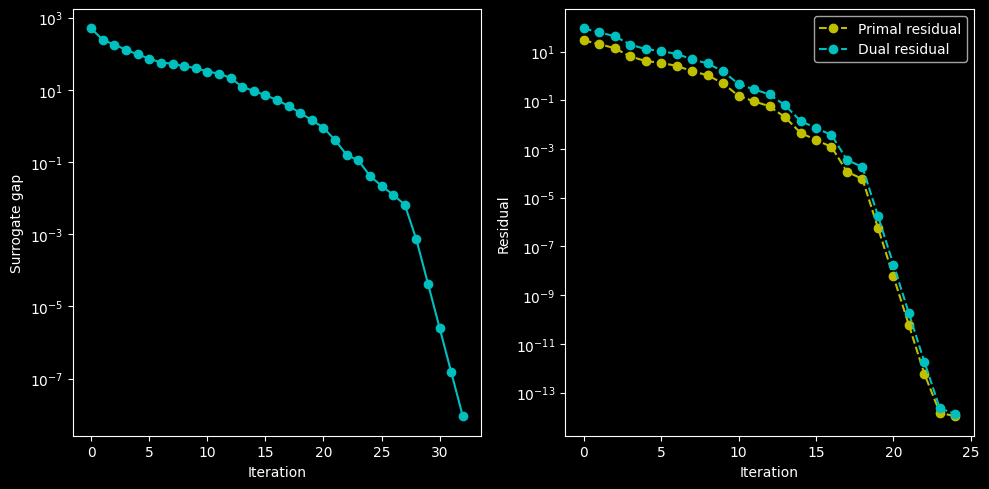

In [9]:
# Primal-dual method only requires x0 to satisfy inequalty constraints
np.random.seed(42)
x0 = np.random.rand(n)
print("Initial objective value", c @ x0)

start_time = time.time()
x, lam, nu, iter, gap_list, rp, rd = pd_ipm_lp_std(A, b, c, x0, mu=20)
print("Time taken:", time.time() - start_time)
print("Optimal objective value:", c @ x)
print("Primal feasible (equality)?", np.allclose(A @ x, b))
print("Primal feasible (inequality)?", np.all(x >= 0))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].semilogy(range(len(gaps)), gaps, 'o-', c='c')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Surrogate gap')

axs[1].semilogy(range(len(rp)), rp, 'o--', c='y', label="Primal residual")
axs[1].semilogy(range(len(rd)), rd, 'o--', c='c', label="Dual residual")
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Residual')
axs[1].legend()

plt.tight_layout()
plt.show()

#### QP example

$$\min \frac{1}{2}x^TQx+p^Tx,\,\, \text{s.t. } Ax=b, Cx\leq d, A\in \mathbf{R}^{m \times n}, C\in \mathbf{R}^{p \times n}$$

We have

* dual residual $r_d=Qx+p+C^T\lambda+A^T\nu$
* centrality residual $r_c=-\text{diag}(\lambda)(Cx-d)-\frac{1}{t}\mathbf{1}$
* primal residual $r_p=Ax-b$

and the KKT equations

$$\begin{bmatrix}Q & C^T & A^T \\ -\text{diag}(\lambda)C & -\text{diag}(Cx-d) & 0 \\ A & 0 & 0\end{bmatrix}\begin{bmatrix}\Delta x \\ \Delta \lambda \\ \Delta \nu\end{bmatrix}=-\begin{bmatrix}r_d \\ r_c\\ r_p\end{bmatrix}$$

In [10]:
np.random.seed(42)

m, n, p = 100, 200, 300
A = np.random.randn(m, n)
C = np.random.randn(p, n)
x = np.random.rand(n)
d0 = C @ x
# x strictly feasible
d = d0 + 1
b = A @ x
Q = np.random.randn(n, n)
Q = Q.T @ Q
p = np.random.randn(n)
x0 = x.copy()

In [11]:
x_var = cp.Variable(n)
constraints = [A @ x_var == b, C @ x_var <= d]
objective = cp.Minimize(0.5 * cp.quad_form(x_var, Q) + p @ x_var)
problem = cp.Problem(objective, constraints)

start_time = time.time()
result = problem.solve(solver=cp.SCS, eps=1e-6)
print("Time taken:", time.time() - start_time)

print("Optimal objective value (CVXPY):", result)
print("Primal feasible (equality)?", np.allclose(A @ x_var.value, b))
print("Primal feasible (inequality)?", np.all(C @ x_var.value <= d))

Time taken: 3.6282808780670166
Optimal objective value (CVXPY): 4581.416035780793
Primal feasible (equality)? True
Primal feasible (inequality)? False


In [12]:
def pd_ipm_qp(Q, p, A, b, C, d, x0, mu, n_iter=100):
    n_iter = n_iter
    gap_eps = 1e-8
    res_eps = 1e-8
    mu = mu
    alpha = 0.01
    beta = 0.5

    m, n = A.shape
    p_dim, _ = C.shape
    gap_list = []
    res_p_list = []
    res_d_list = []

    x = x0.copy()
    fx = C @ x - d
    lam = np.ones(p_dim)
    nu = np.ones(m)

    for iter in range(n_iter):
        # surrogate duality gap -f(x)^T lambda
        gap = -fx @ lam
        gap_list.append(gap)

        res_d = Q @ x + p + C.T @ lam + A.T @ nu
        res_p = A @ x - b
        res_d_list.append(np.linalg.norm(res_d))
        res_p_list.append(np.linalg.norm(res_p))

        if gap < gap_eps and np.linalg.norm(res_p) < res_eps and np.linalg.norm(res_d) < res_eps:
            return x, lam, nu, iter, gap_list, res_p_list, res_d_list

        # primal-dual steps
        # get t
        t = m * mu / gap

        # KKT equations
        # 2 x 2 block
        kkt_block = np.block([
            [Q, C.T, A.T],
            [-np.diag(lam) @ C, -np.diag(C @ x - d), np.zeros((p_dim, m))],
            [A, np.zeros((m, p_dim)), np.zeros((m, m))]
        ])
        rhs = -np.concatenate([res_d, -np.diag(lam) @ (C @ x - d) - 1/t, res_p])

        dy = np.linalg.solve(kkt_block, rhs)
        dx = dy[:n]
        dlam = dy[n:n+p_dim]
        dnu = dy[n+p_dim:]

        # line search
        old_r = -rhs
        s_max = min(1, min(-lam[dlam<0]/dlam[dlam<0]))
        s = 0.99 * s_max

        # primal feasibility (f(x+s dx)<0)
        while np.min(C @ (x + s * dx) - d) >= 0:
            s *= beta

        newx = x + s * dx
        newlam = lam + s * dlam
        newnu = nu + s * dnu
        new_r = np.concatenate([Q @ newx + p + C.T @ newlam + A.T @ newnu, -np.diag(newlam) @ (C @ newx - d) - 1/t, A @ newx - b])

        while np.linalg.norm(new_r) > (1 - alpha * s) * np.linalg.norm(old_r):
            s *= beta
            newx = x + s * dx
            newlam = lam + s * dlam
            newnu = nu + s * dnu
            new_r = np.concatenate([Q @ newx + p + C.T @ newlam + A.T @ newnu, -np.diag(newlam) @ (C @ newx - d) - 1/t, A @ newx - b])

        x += s * dx
        lam += s * dlam
        nu += s * dnu
        fx = C @ x - d

    return x, lam, nu, iter, gap_list, res_p_list, res_d_list

Initial objective value 5808.8737062053315
Time taken: 0.8891634941101074
Optimal objective value: 4581.415939709281
Primal feasible (equality)? True
Primal feasible (inequality)? True


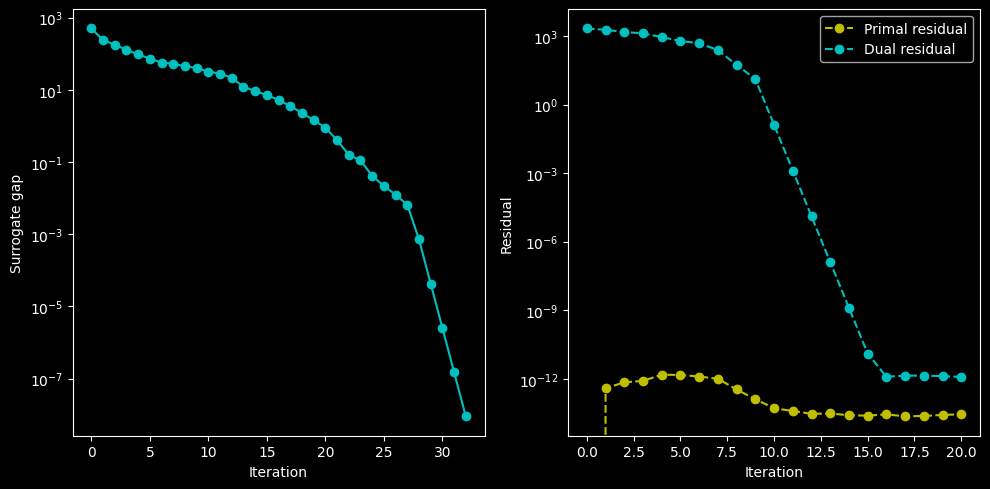

In [13]:
# np.random.seed(42)
# x0 = np.random.rand(n)
print("Initial objective value", 0.5 * x0.T @ Q @ x0 + p @ x0)

start_time = time.time()
x, lam, nu, iter, gap_list, rp, rd = pd_ipm_qp(Q, p, A, b, C, d, x0, mu=20)
print("Time taken:", time.time() - start_time)
print("Optimal objective value:", 0.5 * x.T @ Q @ x + p @ x)
print("Primal feasible (equality)?", np.allclose(A @ x, b))
print("Primal feasible (inequality)?", np.all(C @ x <= d))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].semilogy(range(len(gaps)), gaps, 'o-', c='c')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Surrogate gap')

axs[1].semilogy(range(len(rp)), rp, 'o--', c='y', label="Primal residual")
axs[1].semilogy(range(len(rd)), rd, 'o--', c='c', label="Dual residual")
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Residual')
axs[1].legend()

plt.tight_layout()
plt.show()